In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

Code to dezip data

In [ ]:
# import gzip
# import shutil
# with gzip.open('IMDB_data/title.akas.tsv.gz', 'rb') as f_in:
#     with open('IMDB_data/title.akas.tsv', 'wb') as f_out:
#         shutil.copyfileobj(f_in, f_out)

# Exploratory data analysis

In this notebook we are going to load the data and start to do some preliminary data exploration.

## 1) Character metadata

This dataset contains information about 450'669 characters along with movies, extracted from the November 4, 2012 dump of Freebase

In [2]:
columns_character = ['Wikipedia movie ID', 'Freebase movie ID', 'Movie release date', 'Character name', 'Actor date of birth',
                     'Actor gender', 'Actor height (in meters)', 'Actor ethnicity (Freebase ID)', 'Actor name', 
                     'Actor age at movie release', 'Freebase character/actor map ID', 'Freebase character ID',
                     'Freebase actor ID']

df_character = pd.read_csv("MovieSummaries/character.metadata.tsv",sep='\t',names=columns_character)
df_character.head()

,Wikipedia movie ID,Freebase movie ID,Movie release date,Character name,Actor date of birth,Actor gender,Actor height (in meters),Actor ethnicity (Freebase ID),Actor name,Actor age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


### Map freebase ID  

As we are interested in the exploration of the ethnicities, we need to map the freebase ID of the ethnicities to something more meaningful for a human

In [87]:
# Load the data to map the Freebase ID to a title
df_mapID = pd.read_csv("Expanded_data/mid2name.tsv", sep='\t', names=['ID', 'title'])
df_mapID.head()

,ID,title
0,/m/0gw0,Anarchism
1,/m/0gwj,Autism
2,/m/0gx0,Albedo
3,/m/0gxj,Abu Dhabi
4,/m/0gy0,A


In [88]:
print(df_mapID.shape)
print(df_mapID.dtypes)

(7606464, 2)
ID       object
title    object
dtype: object


In [89]:
# Example of a mapping of one ethnicity
df_mapID.loc[df_mapID.ID == '/m/0x67']

,ID,title
813,/m/0x67,African American
3314645,/m/0x67,African Amerian
3314646,/m/0x67,Black-American
3314647,/m/0x67,Brotha
3314648,/m/0x67,Light-skinned AfricanAmerican
3314649,/m/0x67,Afrimerican
3314650,/m/0x67,African american
3314651,/m/0x67,African americans
3314652,/m/0x67,Blacks in America
3314653,/m/0x67,African-Amerian


In [90]:
# As there is many titles to one ID, we choose to drop duplicate by keeping only the first row in which the ID appears
print(df_mapID.ID.is_unique)
df_mapID = df_mapID.drop_duplicates(subset=["ID"], keep='first')
print(df_mapID.shape)

False
(3305955, 2)


In [92]:
# Merging the ethnicity ID with the mapID data
ethnicity = df_character['Actor ethnicity (Freebase ID)']
df_ethnicity = ethnicity.to_frame()
df_ethnicity.columns = ['ID']
df_ethnicity.head()
df_merge = pd.merge(df_ethnicity, df_mapID, how='left')
df_merge.head()

,ID,title
0,NaN,NaN
1,/m/044038p,NaN
2,/m/0x67,African American
3,NaN,NaN
4,NaN,NaN


In [94]:
# Add the ethnicity titles to the character metadata
df_character['Ethnicity'] = df_merge['title']
df_character.head()

,Wikipedia movie ID,Freebase movie ID,Movie release date,Character name,Actor date of birth,Actor gender,Actor height (in meters),Actor ethnicity (Freebase ID),Actor name,Actor age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID,Ethnicity
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7,NaN
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4,NaN
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,African American
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc,NaN
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg,NaN


### Ethnicity

If we focus on the ethnicity, we see that the dataset contains 344'611 NaN values over 450'669!

344611
(53,)


/Users/garancehaefliger/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


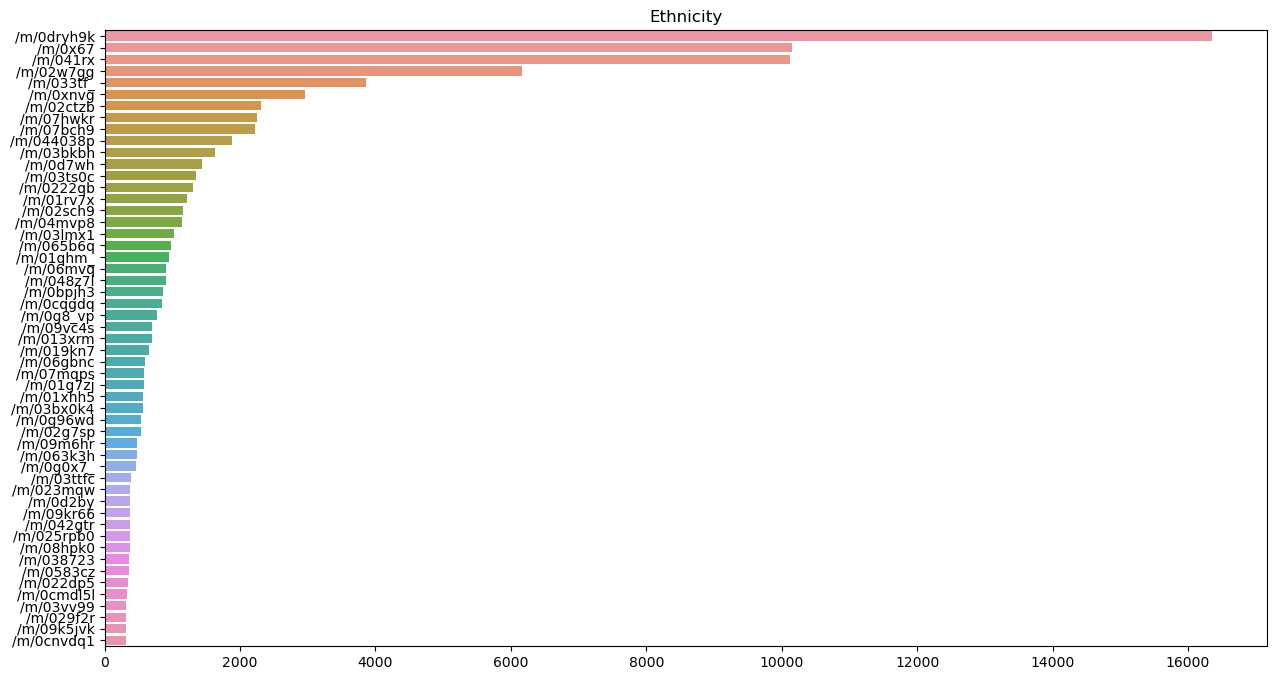

In [100]:
print(sum(df_character['Actor ethnicity (Freebase ID)'].isna()))
df_ethnicity = df_character['Actor ethnicity (Freebase ID)'].dropna()
relevant_race = df_ethnicity.value_counts()
relevant_race = relevant_race[relevant_race > 300]
print(relevant_race.shape)

plt.figure(figsize=(15,8))
ax = sns.barplot(relevant_race.values, relevant_race.index).set(title='Ethnicity')
plt.show()

347872
(51,)


/Users/garancehaefliger/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


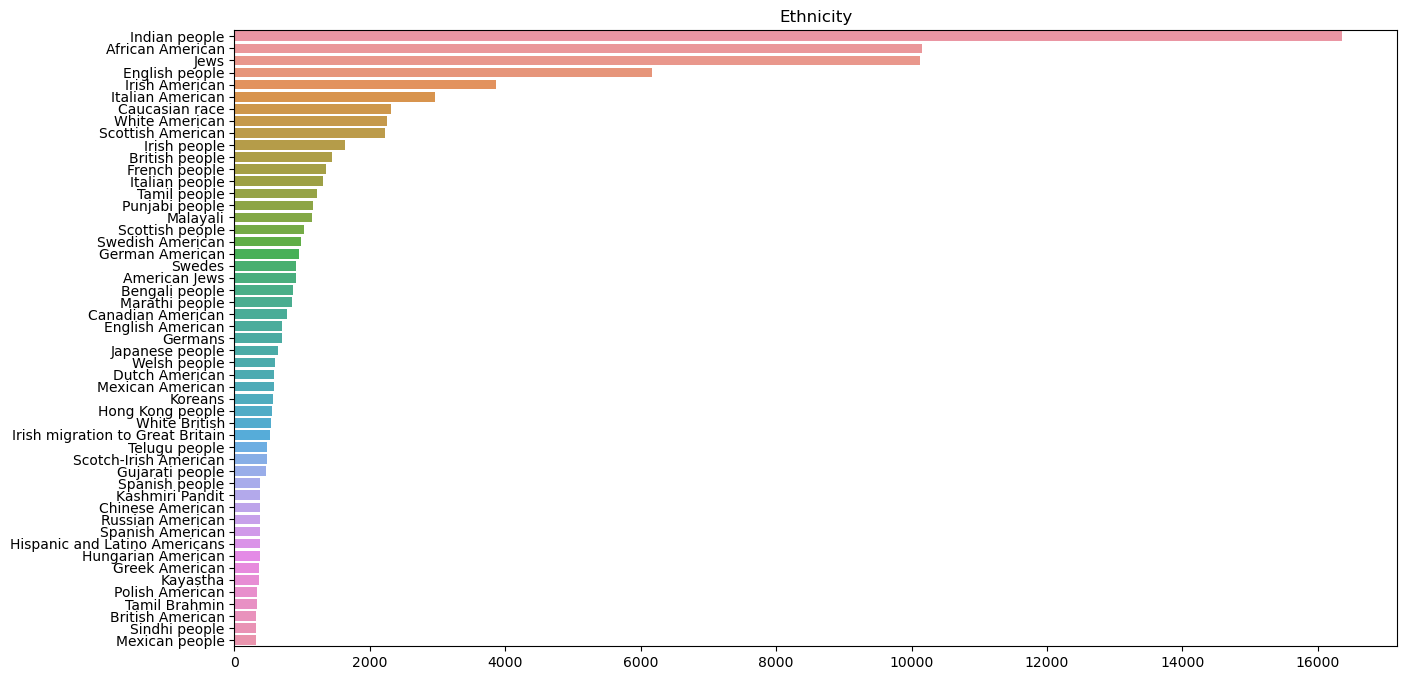

In [101]:
# With the ethnicity column
print(sum(df_character['Ethnicity'].isna()))
df_ethnicity = df_character['Ethnicity'].dropna()
relevant_race = df_ethnicity.value_counts()
relevant_race = relevant_race[relevant_race > 300]
print(relevant_race.shape)

plt.figure(figsize=(15,8))
ax = sns.barplot(relevant_race.values, relevant_race.index).set(title='Ethnicity')
plt.show()

## 2) Movie metadata

This dataset contains information about 81'741 movies, extracted from the Noverber 4, 2012 dump of Freebase.

In [86]:
# columns_movie = ['Wikipedia movie ID', 'Freebase movie ID', 'Movie name', 'Movie release date', 'Movie box office revenue',
#                  'Movie runtime', 'Movie languages (Freebase ID:name tuples)', 'Movie countries (Freebase ID:name tuples)',
#                  'Movie genres (Freebase ID:name tuples)', 'averageRating', 'numVotes']

df_movie = pd.read_csv("Expanded_data/movie.expanded_metadata.tsv",sep='\t')
df_movie.head()

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages (Freebase ID:name tuples),Movie countries (Freebase ID:name tuples),Movie genres (Freebase ID:name tuples),Movie release year,averageRating,numVotes
0,975900,/m/03vyhn,ghosts of mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001.0,4.9,55203.0
1,3196793,/m/08yl5d,getting away with murder: the jonbenét ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",2000.0,NaN,NaN
2,28463795,/m/0crgdbh,brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",1988.0,NaN,NaN
3,9363483,/m/0285_cd,white of the eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",1987.0,6.1,2604.0
4,261236,/m/01mrr1,a woman in flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}",1983.0,6.0,589.0
